# A 7.2



### Imports

In [37]:
include("channel_equalization_data.jl")
using Plots
Plots.pyplot()

Plots.PyPlotBackend()


### Plot h, c, h $*$ c

h = [0.9214015838276353, -0.5521876169295151, 0.5573851982305564, -0.33847254425948153, 0.19274372830178776]
c = [1.0, 0.7, -0.3, -0.1, 0.05]
h * c = [0.9214015838276352, 0.09279349174982951, -0.10556660876839458, 0.12521322119799888, -0.11011377126468291, 0.1531144724195644, 0.0038933958469396695, -0.03619800004315286, 0.009637186415089396]


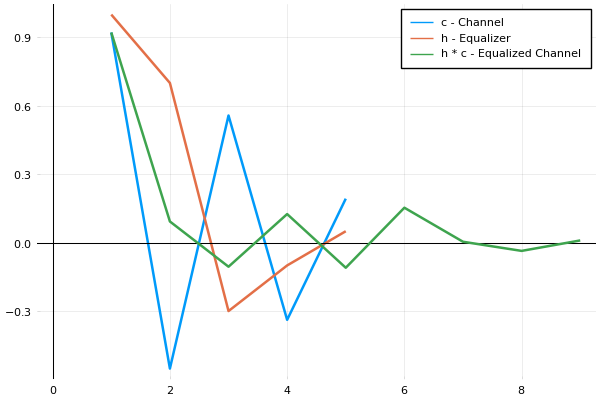

In [38]:
using DSP
println("h = ", h)
println("c = ", c)
println("h * c = ", conv(h, c))
plot([h, c, conv(h, c)], framestyle = :zerolines, label = ["c - Channel" "h - Equalizer" "h * c - Equalized Channel"], lw = 1.8)
#plot(h, framestyle = :zerolines, label = "h")

### From the above graph it is clear that equalizer is used to equalize the frequency changes in the signal, thus resulting in a smoother Equalized Channel line h $*$ c

### Plot s, $y$ and $\tilde{y} $

Bool[0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1,

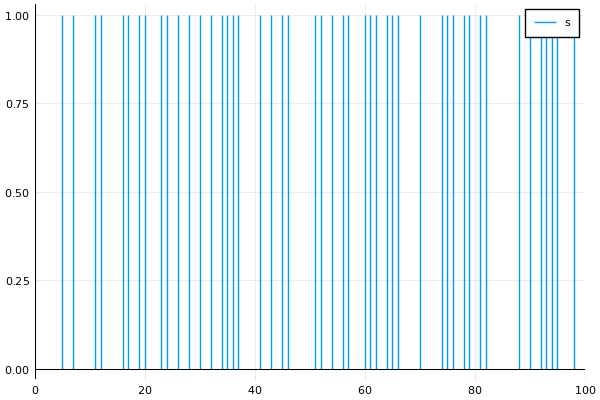

In [48]:
print(s)
plot(s, xlim = (0,100), framestyle = :zerolines, st = :sticks, label = "s")

### Compute and plot y = c $*$ s

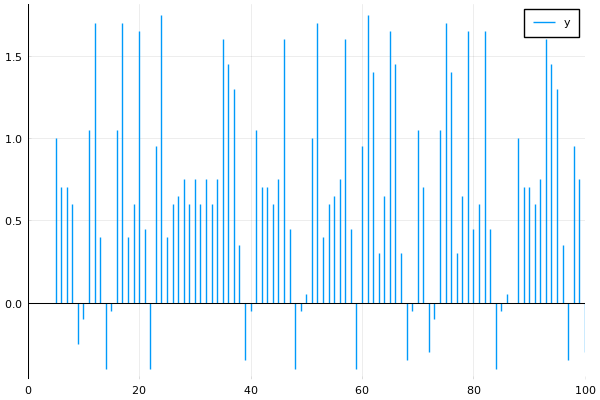

In [49]:
y = conv(c, s)
#print(y)
plot(y, xlim = (0,100), framestyle = :zerolines, st = :sticks, label = "y")

### Compute and plot $\tilde{y}$ = h $*$ y

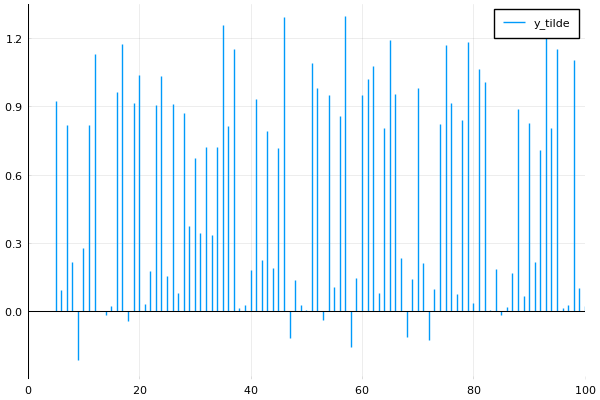

In [50]:
y_tilde = conv(h, y)
#print(y_tilde)
plot(y_tilde, xlim = (0,100), framestyle = :zerolines, st = :sticks, label = "y_tilde")

## From the plots it looks like $\hat{s}$ will be a worse estimate of s, than $\hat{s}^{eq}$ since there are a lot of lines in the graph of y that seems to produce a different result from that of s. This can be more clearly seen after plotting the graphs of $\hat{s}$ and $\hat{s}^{eq}$

### Function to compute round(vector)

In [42]:
function round(x)
    return 1(x .> 0.5)
end

round (generic function with 1 method)

### Compute and plot $\hat{s}$ = round(y)

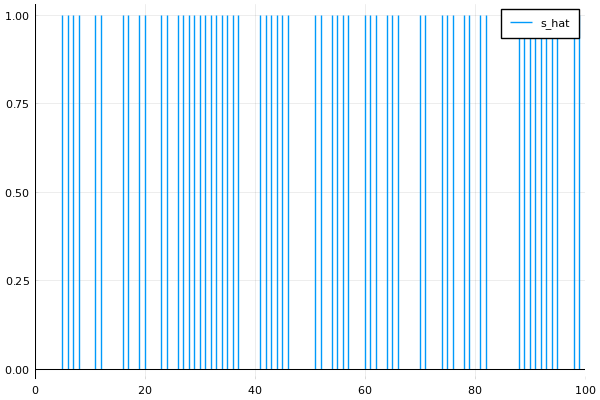

In [51]:
s_hat = round(y)
plot(s_hat, xlim = (0,100), framestyle = :zerolines, st = :sticks, label = "s_hat")

### Compute and plot $\hat{s}^{eq}$ = round($\tilde{y}$)

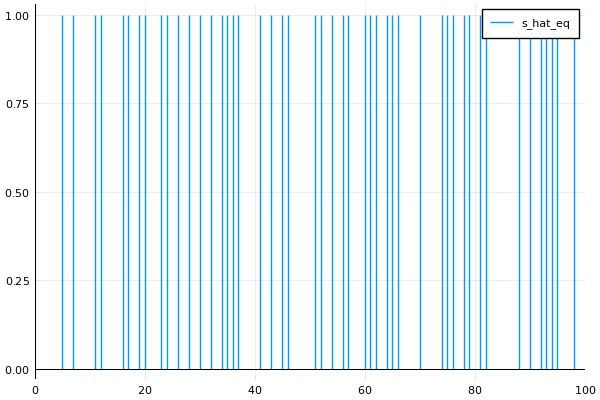

In [52]:
s_hat_eq = round(y_tilde)
plot(s_hat_eq, xlim = (0,100), framestyle = :zerolines, st = :sticks, label = "s_hat_eq")

### Computing BER for $\hat{s}$ and $\hat{s}^{eq}$

In [45]:
ber_s_hat = count(i -> i == 0, s_hat[1:1000] .== s) / 1000
print("BER in s_hat = ", ber_s_hat)

BER in s_hat = 0.132

In [46]:
ber_s_hat_eq = count(i -> i == 0, s_hat_eq[1:1000] .== s) / 1000
print("BER in s_hat_eq = ", ber_s_hat_eq)

BER in s_hat_eq = 0.0

## The BER values in $\hat{s}$ and $\hat{s}^{eq}$, are printed as "BER in s_hat" and "BER in s_hat_eq" respectively above